# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import base64
import numpy as np
import os
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
import pickle
from sklearn.svm import SVC
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.models import Sequential

# Importing Dataset

In [4]:
dataset = pd.read_csv('Dataset/dataset.csv')

# EDA

In [5]:
dataset.head()

,Source,Target
0,fungal infection,itching skin_rash nodal_skin_eruptions dischro...
1,fungal infection,skin_rash nodal_skin_eruptions dischromic_patches
2,fungal infection,itching nodal_skin_eruptions dischromic_patches
3,fungal infection,itching skin_rash dischromic_patches
4,fungal infection,itching skin_rash nodal_skin_eruptions


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  4920 non-null   object
 1   Target  4920 non-null   object
dtypes: object(2)
memory usage: 77.0+ KB


In [7]:
dataset.isnull().sum()

Source    0
Target    0
dtype: int64

In [8]:
dataset.describe()

,Source,Target
count,4920,4920
unique,41,304
top,fungal infection,constipation pain_during_bowel_movements pain_...
freq,120,90


# Data Visualization

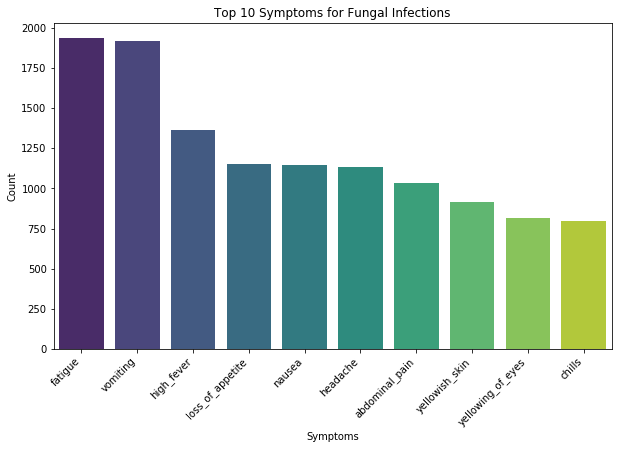

In [9]:
symptom_counts = dataset['Target'].str.split().explode().value_counts()


top_n = 10  
plt.figure(figsize=(10, 6))
sns.barplot(x=symptom_counts.head(top_n).index, y=symptom_counts.head(top_n).values, palette="viridis")
plt.title('Top {} Symptoms for Fungal Infections'.format(top_n))
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Text Cleaning

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def cleanData(doc):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = ' '.join(tokens)
    return tokens

In [11]:
labels = dataset['Source'].unique().tolist()
symptoms = dataset.Target
diseases = dataset.Source
Y = []
for i in range(len(diseases)):
    index = labels.index(diseases[i])
    Y.append(index)

In [12]:
X = []
for i in range(len(symptoms)):
    arr = symptoms[i]
    arr = arr.strip().lower()
    arr = arr.replace("_", " ")
    X.append(cleanData(arr))

In [13]:
R = []
for i in range(len(symptoms)):
    arr = symptoms[i]
    arr = arr.strip().lower()
    arr = arr.replace("_", " ")
    R.append(cleanData(arr))

# N-gram

In [14]:
ngram_range = (1, 2)  
max_features = 199    

vectorizer1 = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X2 = vectorizer1.fit_transform(R)

In [15]:
y = Y
Y = np.asarray(Y)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X2,y, test_size = 0.20, random_state = 42)

# Random Forest

In [17]:
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train, Y_train)
predictions = RF.predict(X_test)
val2 = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for Random Forest: ", val2, "\n")
print("*Confusion Matrix for Random Forest: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for Random Forest: ")
print(classification_report(Y_test, predictions))

*Accuracy score for Random Forest:  80.6910569105691 

*Confusion Matrix for Random Forest: 
[[16  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 24]]
*Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.00      0.00      0.00        24
           2       0.97      1.00      0.98        28
           3       0.11      1.00      0.19        15
           4       1.00      0.83      0.91        24
           5       1.00      1.00      1.00        17
           6       0.00      0.00      0.00        30
           7       1.00      1.00      1.00        21
           8       1.00      0.96      0.98        25
           9       0.00      0.00      0.00        33
          10       0.00      0.00      0.00        25
          11       1.00      1.00      1.00        25
     

In [18]:
acc = accuracy_score(Y_test, predictions) * 100
p = precision_score(Y_test, predictions,average='macro') * 100 
r = recall_score(Y_test, predictions,average='macro') * 100
f = f1_score(Y_test, predictions,average='macro') * 100



print("Accuracy: {:.2f}%".format(acc))
print("Precision: {:.2f}%".format(p))
print("Recall: {:.2f}%".format(r))
print("F1-score: {:.2f}%".format(f))

Accuracy: 80.69%
Precision: 79.24%
Recall: 83.49%
F1-score: 79.85%


# TF-IDF

In [19]:
stopwords=stopwords = nltk.corpus.stopwords.words("english")
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords, use_idf=True,smooth_idf=False, norm=None, decode_error='replace')
tfidf = tfidf_vectorizer.fit_transform(X).toarray()        
df = pd.DataFrame(tfidf, columns=tfidf_vectorizer.get_feature_names())

In [20]:
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer.pkl','wb'))

In [21]:
X = df
y = Y

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

# Random Forest

In [23]:
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train, Y_train)
predictions = RF.predict(X_test)
val2 = (accuracy_score(Y_test, predictions)*100)
print("*Accuracy score for Random Forest: ", val2, "\n")
print("*Confusion Matrix for Random Forest: ")
print(confusion_matrix(Y_test, predictions))
print("*Classification Report for Random Forest: ")
print(classification_report(Y_test, predictions))

*Accuracy score for Random Forest:  80.9959349593496 

*Confusion Matrix for Random Forest: 
[[19  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 20]]
*Classification Report for Random Forest: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.83      0.91        24
           2       1.00      0.82      0.90        28
           3       0.09      1.00      0.17        15
           4       1.00      0.96      0.98        24
           5       1.00      1.00      1.00        17
           6       0.00      0.00      0.00        30
           7       1.00      1.00      1.00        21
           8       0.00      0.00      0.00        25
           9       1.00      0.94      0.97        33
          10       1.00      0.96      0.98        25
          11       1.00      1.00      1.00        25
     

In [24]:
a1 = accuracy_score(Y_test, predictions) * 100
p1 = precision_score(Y_test, predictions,average='macro') * 100 
r1 = recall_score(Y_test, predictions,average='macro') * 100
f1 = f1_score(Y_test, predictions,average='macro') * 100



print("Accuracy: {:.2f}%".format(a1))
print("Precision: {:.2f}%".format(p1))
print("Recall: {:.2f}%".format(r1))
print("F1-score: {:.2f}%".format(f1))

Accuracy: 81.00%
Precision: 80.92%
Recall: 82.77%
F1-score: 80.51%


# CNN - Extension

In [25]:
Y = np.asarray(Y)
print(Y)
X = X.values
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
a = X
b = Y
X1 = a[indices]
Y1 = b[indices]
X = X[indices]
Y = Y[indices]
Y = to_categorical(Y)
X = X.reshape(X.shape[0],X.shape[1],1,1)

[ 0  0  0 ... 38 39 40]


In [26]:
classifier = Sequential()
classifier.add(Convolution2D(32, 1, 1, input_shape = (X.shape[1], X.shape[2], X.shape[3]), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Convolution2D(32, 1, 1, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (1, 1)))
classifier.add(Flatten())
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(Y.shape[1], activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = classifier.fit(X, Y, batch_size=8, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
615/615 - 2s - loss: 0.0827 - accuracy: 0.9831
Epoch 2/10
615/615 - 1s - loss: 6.6952e-05 - accuracy: 1.0000
Epoch 3/10
615/615 - 1s - loss: 2.7446e-05 - accuracy: 1.0000
Epoch 4/10
615/615 - 1s - loss: 1.5217e-05 - accuracy: 1.0000
Epoch 5/10
615/615 - 1s - loss: 9.2349e-06 - accuracy: 1.0000
Epoch 6/10
615/615 - 1s - loss: 5.7523e-06 - accuracy: 1.0000
Epoch 7/10
615/615 - 1s - loss: 3.7511e-06 - accuracy: 1.0000
Epoch 8/10
615/615 - 1s - loss: 2.5823e-06 - accuracy: 1.0000
Epoch 9/10
615/615 - 1s - loss: 1.6551e-06 - accuracy: 1.0000
Epoch 10/10
615/615 - 1s - loss: 1.1714e-06 - accuracy: 1.0000


In [27]:
classifier.save('model.h5')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

predict = classifier.predict(X_test)
predict = np.argmax(predict, axis=1)
testY = np.argmax(y_test, axis=1)

p2 = precision_score(testY, predict,average='macro') * 100
r2 = recall_score(testY, predict,average='macro') * 100
f2 = f1_score(testY, predict,average='macro') * 100
a2 = accuracy_score(testY,predict)*100

print("Accuracy: {:.2f}%".format(a2))
print("Precision: {:.2f}%".format(p2))
print("Recall: {:.2f}%".format(r2))
print("F1-score: {:.2f}%".format(f2))



Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%


# Comparison

In [29]:
results = {
    'Accuracy': [acc, a1, a2],
    'Recall': [r, r1, r2],
    'Precision': [p, p1, p2],
    'F1': [f, f1, f2]
}

index = ['Random Forest - N-gram','Random Forest - Tfid','CNN-Extension']

In [30]:
results =pd.DataFrame(results,index=index)
print(results)

                          Accuracy      Recall   Precision          F1
Random Forest - N-gram   80.691057   83.490892   79.241044   79.847754
Random Forest - Tfid     80.995935   82.769995   80.918737   80.510393
CNN-Extension           100.000000  100.000000  100.000000  100.000000


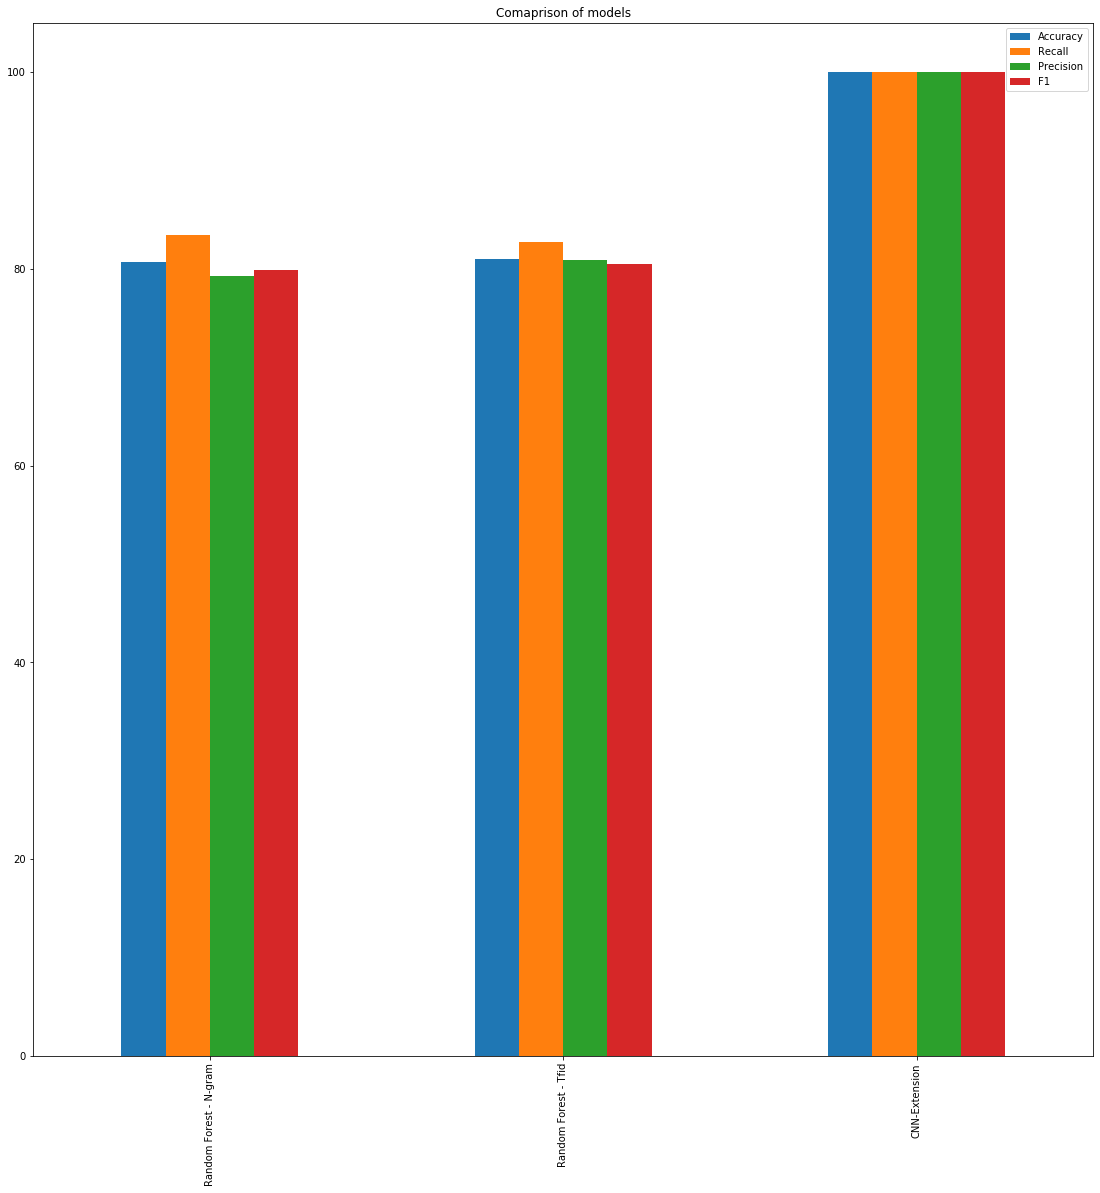

In [31]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

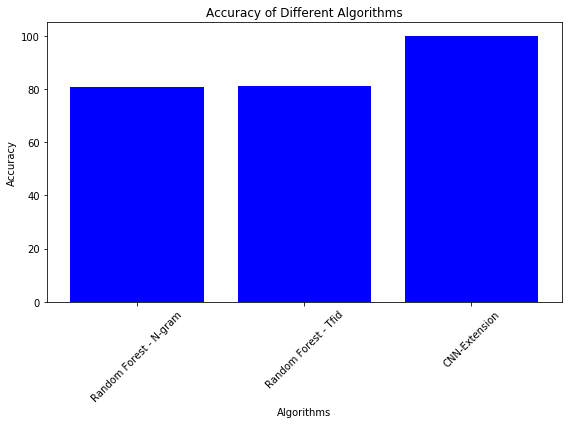

In [32]:
accuracy_values = results['Accuracy']
accuracy_df = pd.DataFrame({'Algorithms': index, 'Accuracy': accuracy_values})

plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Algorithms'], accuracy_df['Accuracy'], color='blue')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

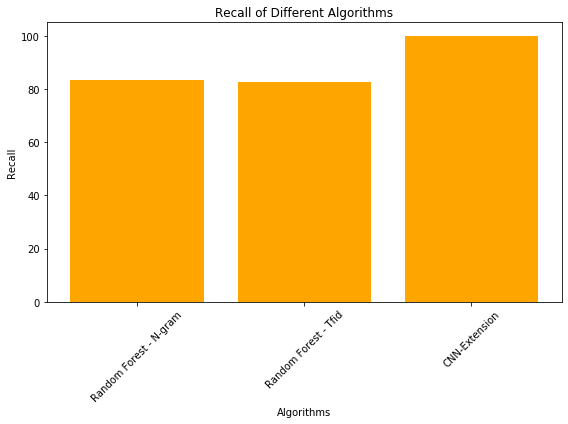

In [33]:
recall_values = results['Recall']
recall_df = pd.DataFrame({'Algorithms': index, 'Recall': recall_values})

plt.figure(figsize=(8, 6))
plt.bar(recall_df['Algorithms'], recall_df['Recall'], color='orange')
plt.title('Recall of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

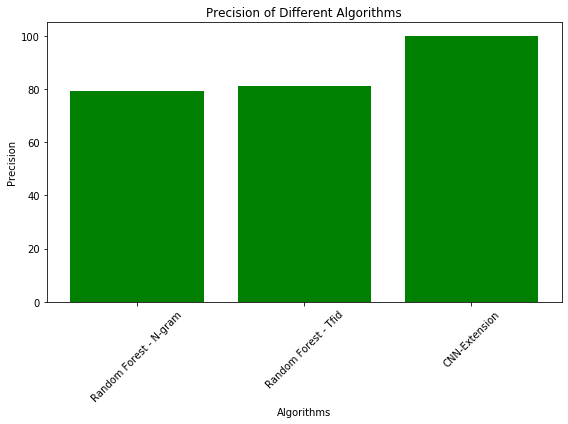

In [34]:
precision_values = results['Precision']
precision_df = pd.DataFrame({'Algorithms': index, 'Precision': precision_values})

plt.figure(figsize=(8, 6))
plt.bar(precision_df['Algorithms'], precision_df['Precision'], color='green')
plt.title('Precision of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

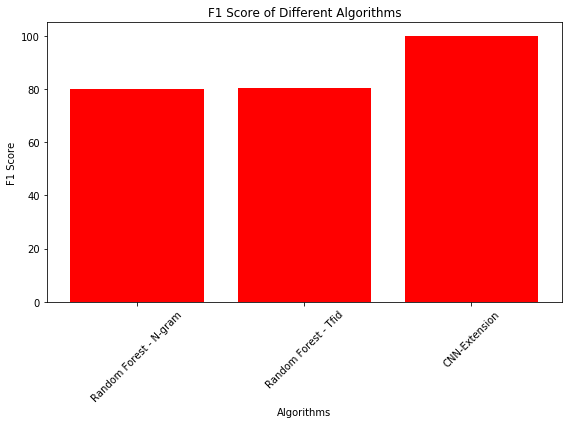

In [35]:
f1_values = results['F1']
f1_df = pd.DataFrame({'Algorithms': index, 'F1 Score': f1_values})

plt.figure(figsize=(8, 6))
plt.bar(f1_df['Algorithms'], f1_df['F1 Score'], color='red')
plt.title('F1 Score of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()